# Central Limit Theorem

The goal of this notebook is to present some simulations involving the Central Limit Theorem.

In [1]:
import numpy as np
import random as rd 
from math import e, pi
import matplotlib.pyplot as plt

Let's start with an arbitrary distribution, $X$, which has a mean $\mu$ and standard deviation $\sigma$. Now, let's take a sample with $n$ items from the initial distribution, whatever it may be, and let's call one of these samples $X_i$, with its mean denoted as $\overline{X}_i$. The Central Limit Theorem tells us that when analyzing the distribution of all $\overline{X}_i$, it will have a mean equal to $\mu$ and a standard deviation of $\frac{\sigma}{\sqrt{n}}$.

To test this theorem, let's create a random distribution, with 10 numbers drawn between 1 and 100, with varied weights, also drawn between 1 and 100.

In [2]:
distribution = np.array([rd.randint(1,100) for _ in range(1,11)])
weights = np.array([rd.randint(1,100) for _ in range(len(distribution))])
weights = weights/np.sum(weights)

Calculando a média `mu` e o desvio padrão `std` da distribuição:

In [3]:
mu = np.average(distribution, weights=weights)
sigma = np.std(distribution)

print(f'mean = {mu}')
print()
print(f'standard deviation = {sigma}')

mean = 63.18276762402089

standard deviation = 26.382570003697516


Now, let's take samples with 40 items from our distribution, considering the weights, and calculate the mean of this sample. We will repeat this process `NUM` times. By increasing the number of samples we consider, we obtain the histograms below:

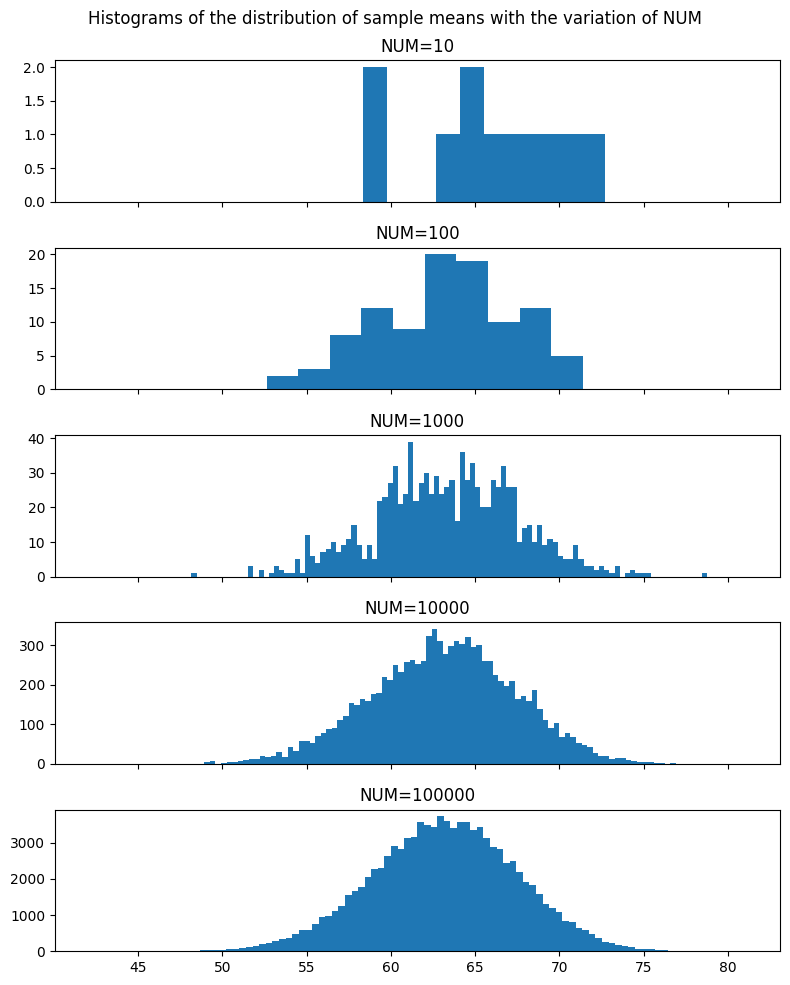

In [4]:
NUM = [10, 100, 1000, 10000, 100000]
mean_list = []

for num in NUM:
    mean = np.array([np.mean(rd.choices(distribution, weights=weights, k=40)) for i in range(num)])
    mean_list.append(mean)

fig, axes = plt.subplots(5, 1, figsize=(8,10), sharex=True)
ax = axes.ravel()

ax[0].hist(mean_list[0], bins=10)
ax[0].set_title('NUM=10')
ax[1].hist(mean_list[1], bins=10)
ax[1].set_title('NUM=100')
ax[2].hist(mean_list[2], bins=100)
ax[2].set_title('NUM=1000')
ax[3].hist(mean_list[3], bins=100)
ax[3].set_title('NUM=10000')
ax[4].hist(mean_list[4], bins=100)
ax[4].set_title('NUM=100000')

fig.suptitle('Histograms of the distribution of sample means with the variation of NUM')
fig.tight_layout()
plt.show()

According to the Central Limit Theorem, this new distribution will have a mean $\mu$ and a standard deviation $\frac{\sigma}{\sqrt{n}}$.

In [5]:
mu_dist = np.mean(mean_list[4])
sigma_dist = np.std(mean_list[4])

print(f'The mean of the new distribution is {mu_dist:.5}')
print()
print(f'The standard deviation of the new distribution is {sigma_dist:.5}, and multiplying by the square root of 40, we get {sigma_dist*np.sqrt(40):.5}')
print()
print(f'For comparison, the mean of the initial distribution was {mu:.5} and the standard deviation was {sigma:.5}')
print()

The mean of the new distribution is 63.155

The standard deviation of the new distribution is 4.3072, and multiplying by the square root of 40, we get 27.241

For comparison, the mean of the initial distribution was 63.183 and the standard deviation was 26.383



As we can see, the new distribution indeed has the mean and standard deviation predicted by the Theorem. Another way to formulate the Central Limit Theorem is that the distribution $\sqrt{n}\frac{\overline{X}_i - \mu}{\sigma}$ approaches the normal distribution, meaning:

\begin{equation}
\frac{\sqrt{n}(\overline X_i - \mu)}{\sigma} \sim N(0,1)
\end{equation}

Visualizing this statement using our distribution:

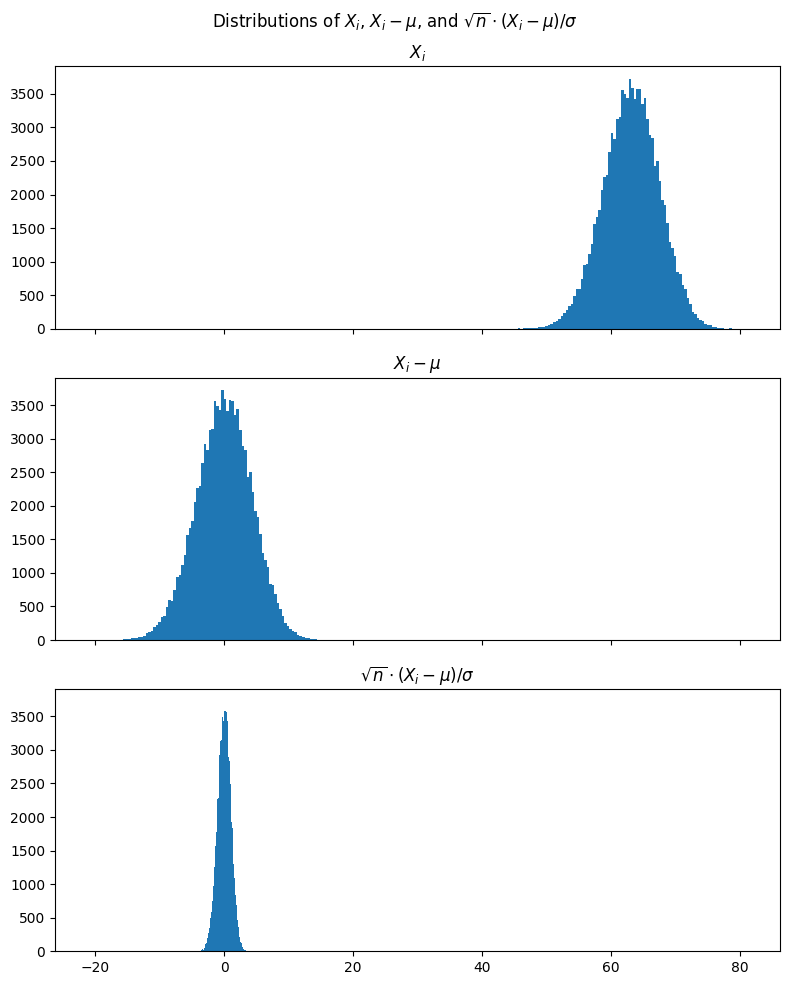

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(8,10), sharex=True)
ax = axes.ravel()

ax[0].hist(mean_list[4], bins=100)
ax[0].set_title(r'$X_i$')
ax[1].hist(mean_list[4]-mu, bins=100)
ax[1].set_title(r'$X_i - \mu$')
ax[2].hist(np.sqrt(40)*(mean_list[4]-mu)/sigma, bins=100)
ax[2].set_title(r'$\sqrt{n}\cdot(X_i - \mu)/\sigma$')

fig.suptitle(r'Distributions of $X_i$, $X_i - \mu$, and $\sqrt{n} \cdot (X_i - \mu) / \sigma$')
fig.tight_layout()
plt.show()

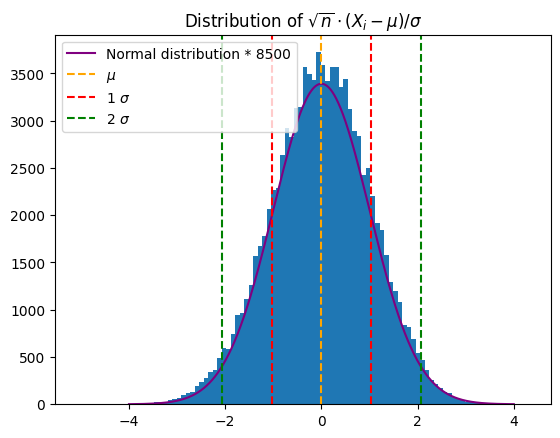

In [7]:
normal = np.sqrt(40)*(mean_list[4]-mu)/sigma
x = np.linspace(-4, 4, 1000)

plt.hist(normal, bins=100)
plt.plot(x, 8500*(1/(np.sqrt(pi*2))) * e**(-0.5*x**2), color='purple', label='Normal distribution * 8500')
plt.title(r'Distribution of $\sqrt{n}\cdot(X_i - \mu)/\sigma$')
plt.axvline(np.mean(normal), linestyle='--', color='orange', label=r'$\mu$')
plt.axvline(np.std(normal), linestyle='--', color='red', label=r'1 $\sigma$')
plt.axvline(-np.std(normal), linestyle='--', color='red')
plt.axvline(2*np.std(normal), linestyle='--', color='green', label=r'2 $\sigma$')
plt.axvline(-2*np.std(normal), linestyle='--', color='green')
plt.legend()
plt.show()